In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [13]:
df = pd.read_csv('Dummy_data.csv')

In [14]:
presentation = df.tail(20)
df = df.drop(df.tail(20).index)
X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [5]:
'''from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

In [6]:
''''# Balancing the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))'''

"'# Balancing the data\nfrom collections import Counter\nfrom imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')\nX_resampled, y_resampled = ros.fit_resample(X_train, y_train)\nprint(sorted(Counter(y_resampled).items()))"

In [19]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [20]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [65]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    mytree = RandomForestClassifier(max_depth = depth_list[index])
    mytree.fit(X_train, y_train.values.ravel())
    y_pred = mytree.predict(X_test)
    depth_tuning[index,1]= accuracy_score(y_test, y_pred)
    depth_tuning[index,2]= precision_score(y_test, y_pred)
    depth_tuning[index,3]= recall_score(y_test, y_pred)
col_names = ['Max_depth','Accuracy','Precision','Recall']
pd.DataFrame(depth_tuning, columns = col_names)

,Max_depth,Accuracy,Precision,Recall
0,2.0,0.758424,0.822785,0.116071
1,3.0,0.786901,0.726531,0.317857
2,4.0,0.794495,0.684058,0.421429
3,5.0,0.797342,0.670077,0.467857
4,6.0,0.802563,0.680000,0.485714
5,7.0,0.803037,0.666667,0.517857
6,8.0,0.806834,0.677494,0.521429
7,9.0,0.800664,0.657658,0.521429
8,10.0,0.804461,0.670507,0.519643
9,11.0,0.794969,0.640969,0.519643


In [23]:
clf = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 30, max_features='sqrt', max_depth = 8)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=30)

In [24]:
score = clf.score(X_test, y_test)
print(score)

prediction_test = clf.predict(X_test)

0.8039867109634552


In [25]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

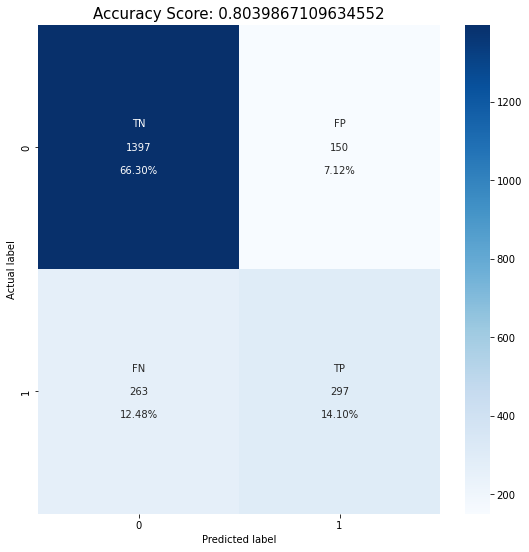

In [66]:
plt.figure(figsize=(9,9))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [48]:
# Feature importance

feature_importances = pd.DataFrame(clf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
contract_Month-to-month,0.165830
tenure,0.153558
totalcharges,0.134216
monthlycharges,0.110608
internetservice_Fiber optic,0.085513
paymentmethod_Electronic check,0.057075
contract_Two year,0.043188
internetservice_No,0.027015
onlinesecurity_Yes,0.021520
techsupport_Yes,0.020953


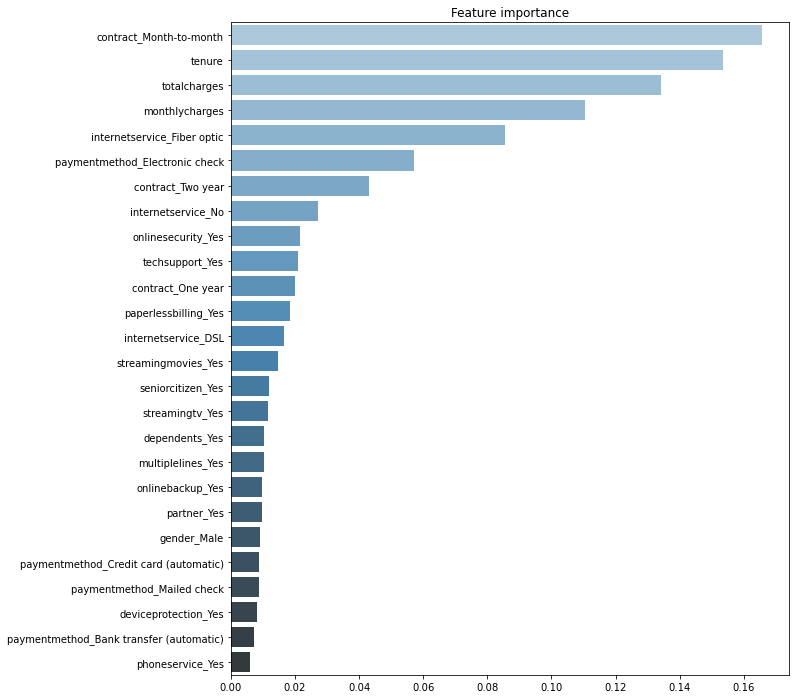

In [49]:
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [50]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(classification_report(y_test,prediction_test))

0.8419446704637917
0.8039867109634552
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1547
           1       0.66      0.53      0.59       560

    accuracy                           0.80      2107
   macro avg       0.75      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107



In [56]:
print(score)

0.8039867109634552


In [58]:
# k-fold cross validation evaluation of xgboost model

from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 30, max_features='sqrt', max_depth = 8)
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model, X, y.values.ravel(), cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 80.28% (0.85%)
